<a href="https://colab.research.google.com/github/Avinash-ml07/kaggle-projects/blob/main/01_eda_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msngo
import seaborn as sns

In [61]:
df = pd.read_csv("/train.csv")
df.info()
df.describe()
df.isnull().sum()
df['Survived'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count
Survived,
0,549
1,342


In [62]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-62-792774890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-62-792774890.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

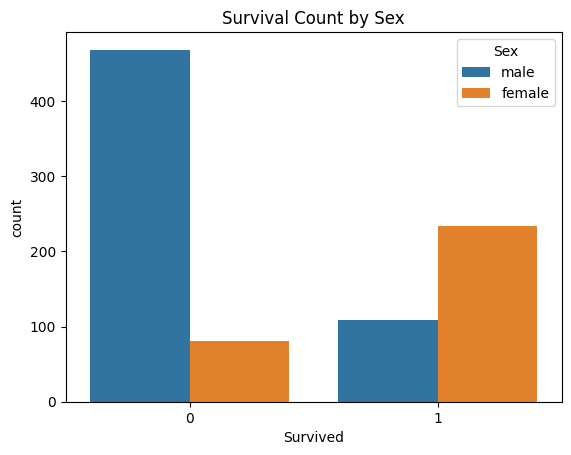

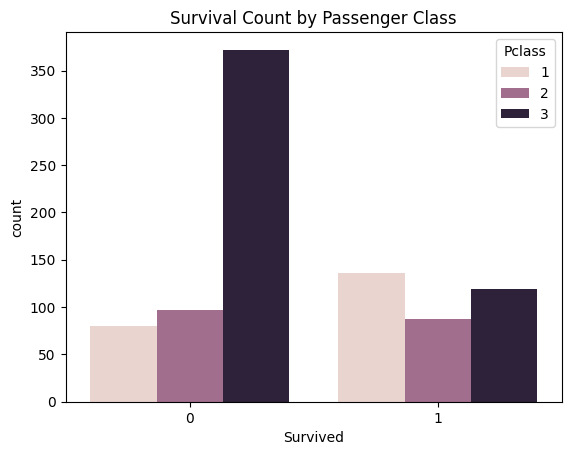

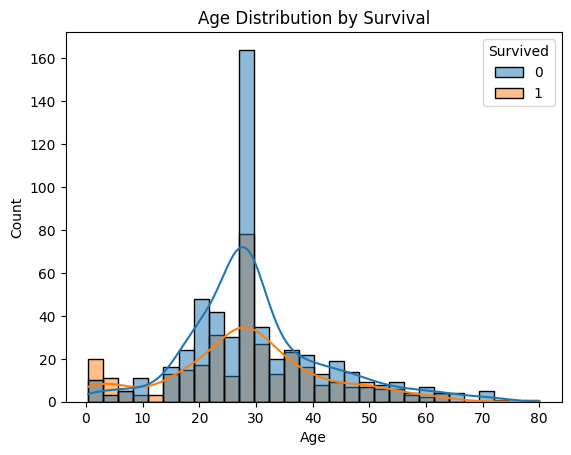

In [63]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Sex")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

In [64]:
data = df.copy()

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

X = data.drop('Survived', axis=1)
y = data['Survived']


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]


In [67]:
test_df = pd.read_csv("/test.csv")

test_df['Age'].fillna(df['Age'].median(), inplace=True)
test_df['Fare'].fillna(df['Fare'].median(), inplace=True)

test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

passenger_ids = test_df['PassengerId']
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


/tmp/ipython-input-67-4239571140.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-67-4239571140.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [68]:
predictions = model.predict(test_df)


In [69]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

submission.to_csv("submission.csv", index=False)


In [70]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>